# Observational Large Ensemble Processing

---

* Global ensemble mean integrals for the three single model ensembles
* Biome averages for the three single model ensembles

In [1]:
%matplotlib inline
import numpy as np
import xarray as xr
import esm_analysis as ea
from glob import glob
import proplot as plot
import matplotlib.pyplot as plt
import yaml
from scipy.io import loadmat
from matplotlib.patches import Rectangle

/global/homes/b/bradyrx/miniconda3/envs/python3/lib/python3.7/site-packages/proplot/projs.py:368: ProPlotWarning: Cartopy projection(s) eck1, eck2, eck3, eck4, eck5, eck6, eqdc, eqearth are unavailable. Consider updating to cartopy>=0.17.0.


In [4]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

## Global Ensemble Averages

This is straight forward, since we are using the native grid.

#### CESM2

In [2]:
basepath = '/global/homes/b/bradyrx/CMIP6_hackathon/processed/CMIP6/'

In [5]:
ds = xr.open_mfdataset(basepath + 'CESM2*.nc', concat_dim='member')

In [11]:
ds = ds.mean('member')

In [16]:
ds.fgco2.attrs['description'] = 'Globally integrated sea-air CO2 flux single model ensemble mean for CESM2'
ds.fgco2.attrs['units'] = 'Pg C yr-1'
ds.fgco2.attrs['direction'] = 'negative flux is into the ocean'
ds.fgco2.attrs['contact'] = 'Riley X. Brady <riley.brady@colorado.edu>'
ds.fgco2.attrs['ensemble'] = '11 members of CESM2 rNi1p1f1 for the CMIP6 project'

In [18]:
ds.to_netcdf('/global/homes/b/bradyrx/CMIP6_hackathon/processed/holly/CESM2_global_ensemble_mean.nc')

#### CanESM5: Main Ensemble

In [19]:
ds = xr.open_mfdataset(basepath + 'CanESM*p1*.nc', concat_dim='member')

In [21]:
ds = ds.mean('member')

In [26]:
ds.fgco2.attrs['description'] = 'Globally integrated sea-air CO2 flux single model ensemble mean for CanESM5'
ds.fgco2.attrs['units'] = 'Pg C yr-1'
ds.fgco2.attrs['direction'] = 'negative flux is into the ocean'
ds.fgco2.attrs['contact'] = 'Riley X. Brady <riley.brady@colorado.edu>'
ds.fgco2.attrs['ensemble'] = '25 members of CanESM5 rNi1p1f1 for the CMIP6 project'

In [27]:
ds.to_netcdf('/global/homes/b/bradyrx/CMIP6_hackathon/processed/holly/CanESM5_p1_global_ensemble_mean.nc')

#### CanESM5: Second Physics

In [28]:
ds = xr.open_mfdataset(basepath + 'CanESM*p2*.nc', concat_dim='member')

In [30]:
ds = ds.mean('member')

In [31]:
ds.fgco2.attrs['description'] = 'Globally integrated sea-air CO2 flux single model ensemble mean for CanESM5'
ds.fgco2.attrs['units'] = 'Pg C yr-1'
ds.fgco2.attrs['direction'] = 'negative flux is into the ocean'
ds.fgco2.attrs['contact'] = 'Riley X. Brady <riley.brady@colorado.edu>'
ds.fgco2.attrs['ensemble'] = '25 members of CanESM5 rNi1p2f1 for the CMIP6 project'

In [32]:
ds.to_netcdf('/global/homes/b/bradyrx/CMIP6_hackathon/processed/holly/CanESM5_p2_global_ensemble_mean.nc')

#### IPSL

In [33]:
ds = xr.open_mfdataset(basepath + 'IPSL*.nc', concat_dim='member')

In [35]:
ds = ds.mean('member')

In [36]:
ds.fgco2.attrs['description'] = 'Globally integrated sea-air CO2 flux single model ensemble mean for IPSL'
ds.fgco2.attrs['units'] = 'Pg C yr-1'
ds.fgco2.attrs['direction'] = 'negative flux is into the ocean'
ds.fgco2.attrs['contact'] = 'Riley X. Brady <riley.brady@colorado.edu>'
ds.fgco2.attrs['ensemble'] = '25 members of IPSL-CM6A-LR rNi1p1f1 for the CMIP6 project'

In [37]:
ds.to_netcdf('/global/homes/b/bradyrx/CMIP6_hackathon/processed/holly/IPSL-CM6A-LR_global_ensemble_mean.nc')

#### Plot

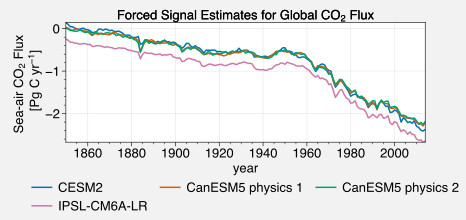

In [56]:
basepath = '/global/homes/b/bradyrx/CMIP6_hackathon/processed/holly/'

plot.rc['legend.frameon'] = False
plot.rc.small = 13
plot.rc.large = 13

f, ax = plot.subplots(axwidth=5, aspect=3, legend='b')

one, = xr.open_dataset(basepath + 'CESM2_global_ensemble_mean.nc').fgco2.plot(label='CESM2', linewidth=1.5, ax=ax)
two, = xr.open_dataset(basepath + 'CanESM5_p1_global_ensemble_mean.nc').fgco2.plot(label='CanESM5 physics 1', linewidth=1.5, ax=ax)
three, = xr.open_dataset(basepath + 'CanESM5_p2_global_ensemble_mean.nc').fgco2.plot(label='CanESM5 physics 2', linewidth=1.5, ax=ax)
four, = xr.open_dataset(basepath + 'IPSL-CM6A-LR_global_ensemble_mean.nc').fgco2.plot(label='IPSL-CM6A-LR', linewidth=1.5, ax=ax)

ax.format(ylabel='Sea-air CO$_{2}$ Flux \n [Pg C yr$^{-1}$]',
          title='Forced Signal Estimates for Global CO$_{2}$ Flux')

f.bottompanel.legend([one,two,three,four])

#f.save('global_ensemble_means.png', dpi=300, transparent=False)